In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.71. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [2]:
df = pd.read_csv("C:/Users/pro_v/OneDrive/Desktop/Bellevue University Data Science/DSC 630/Week 3/dodgers.csv")
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


In [4]:
df["month"].value_counts()

MAY    18
AUG    15
APR    12
JUL    12
SEP    12
JUN     9
OCT     3
Name: month, dtype: int64

In [5]:
df["day_of_week"].value_counts()

Sunday       13
Tuesday      13
Friday       13
Saturday     13
Wednesday    12
Monday       12
Thursday      5
Name: day_of_week, dtype: int64

In [6]:
df["opponent"].value_counts()

Giants       9
Snakes       9
Padres       9
Rockies      9
Cardinals    7
Brewers      4
Mets         4
Cubs         3
Astros       3
Nationals    3
Pirates      3
Phillies     3
Braves       3
White Sox    3
Reds         3
Marlins      3
Angels       3
Name: opponent, dtype: int64

In [7]:
df["skies"].value_counts()

Clear     62
Cloudy    19
Name: skies, dtype: int64

In [8]:
df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


The minimum attendance is 24312. This is the number we will target in our regression model. I will look to see what day of the week would have the least attendance through multi-class logistic regression and target that day for run a marketing promotion to increase attendance.

In [9]:
df.describe(include=['O'])

,month,day_of_week,opponent,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81,81,81,81,81,81,81,81
unique,7,7,17,2,2,2,2,2,2
top,MAY,Sunday,Giants,Clear,Night,NO,NO,NO,NO
freq,18,13,9,62,66,79,78,67,70


In [10]:
df.isnull().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

The data is clear as there are no missing values.

In [11]:
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.71. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [12]:
sweetviz_report = sv.analyze(df)

In [13]:
sweetviz_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


The result of the Exploratory data analysis using sweetviz, shows a positive correlation between and the month, day of the week, opponent and bobblehead increasing in that manner. These would be factored in when making the analysis of what products to run for the marketing promotion to increase attendance. The results also show the bar chart of each variable and their association and correlation with other variables.

In [14]:
AV = AutoViz_Class()

Shape of your Data Set: (81, 12)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 6
Number of Categorical and Continuous Vars exceeds limit, hence no Bar Plots
Time to run AutoViz (in seconds) = 0.579


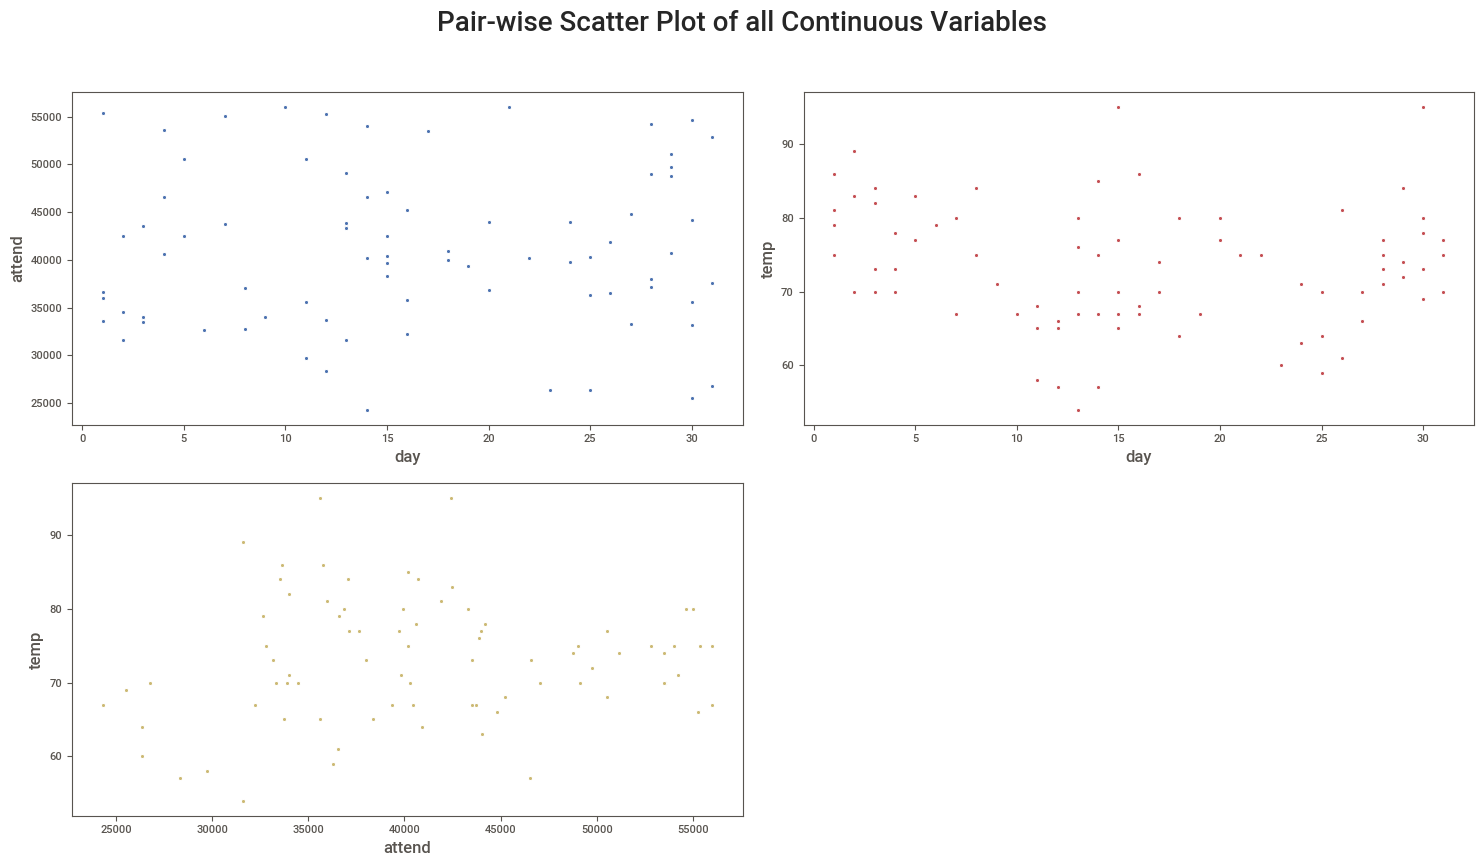

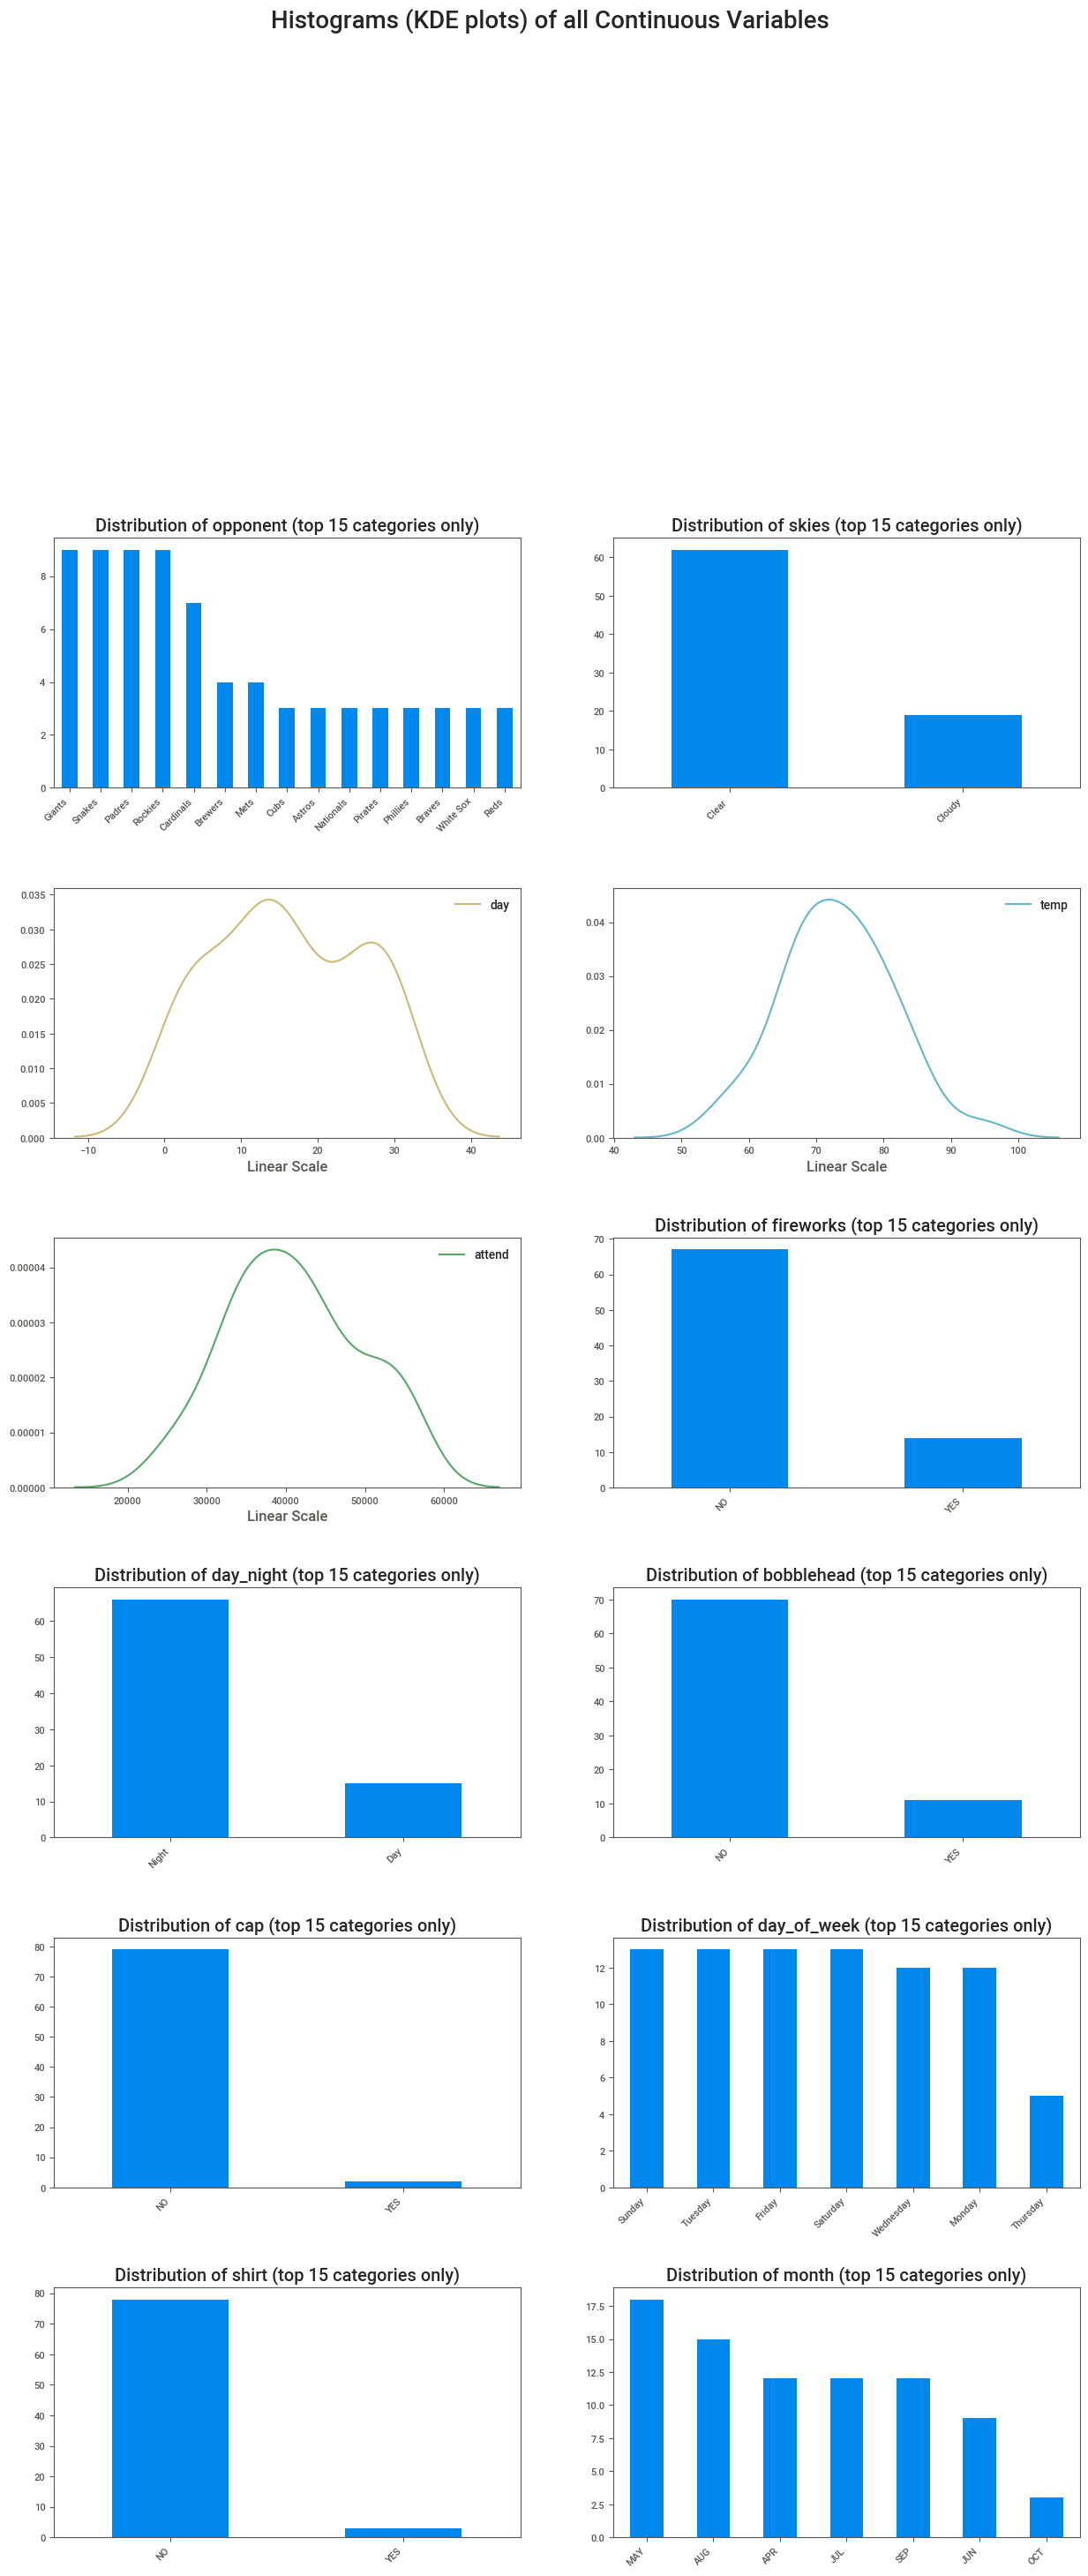

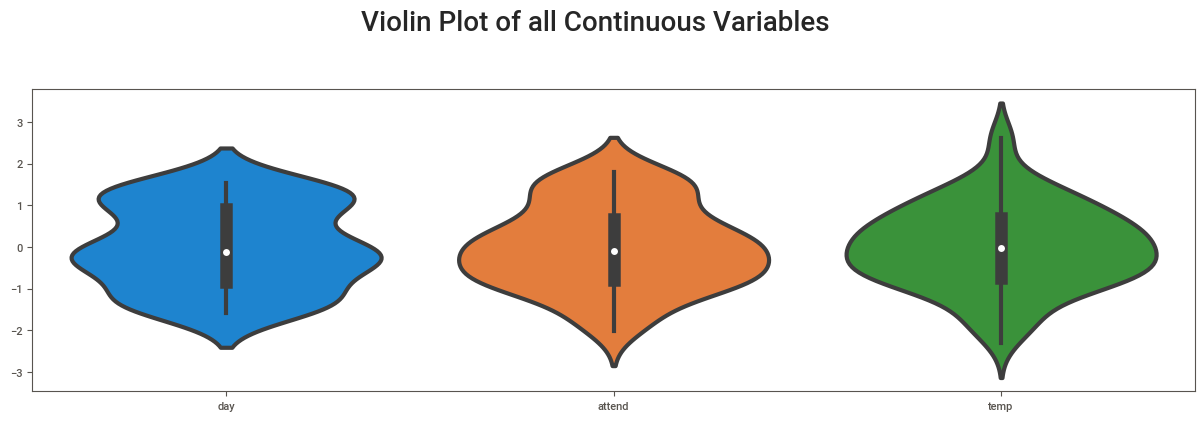

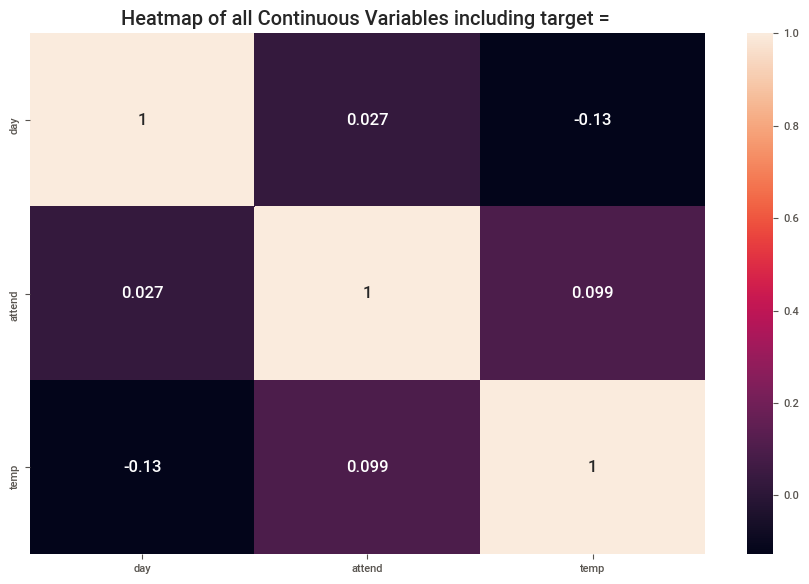

In [15]:
df_1 = AV.AutoViz('C:/Users/pro_v/OneDrive/Desktop/Bellevue University Data Science/DSC 630/Week 3/dodgers.csv')

In [16]:
mean_score_1 = (47741,43073,42269,40407,40117,37585,34966)
day = ("Tuesday", "Saturday", "Sunday", "Thursday", "Friday", "Wednesday", "Monday")

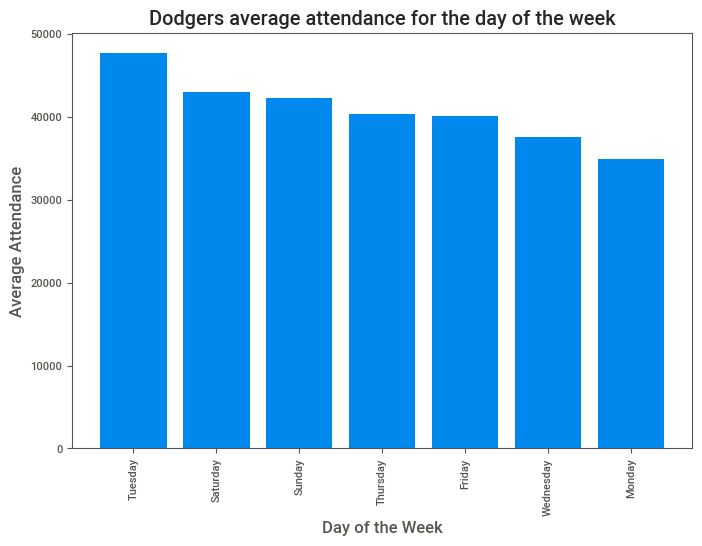

In [17]:
fig, ax = plt.subplots()
ax.bar(day, mean_score_1)
ax.set_xticklabels(day, rotation=90)
ax.set_ylabel("Average Attendance")
ax.set_xlabel("Day of the Week")
ax.set_title("Dodgers average attendance for the day of the week")
plt.show()

In [18]:
mean_score_2 = (47940,43884,42751,39592,38955,37346,36704)
month_year = ("June","July","August","April","September","May","October")

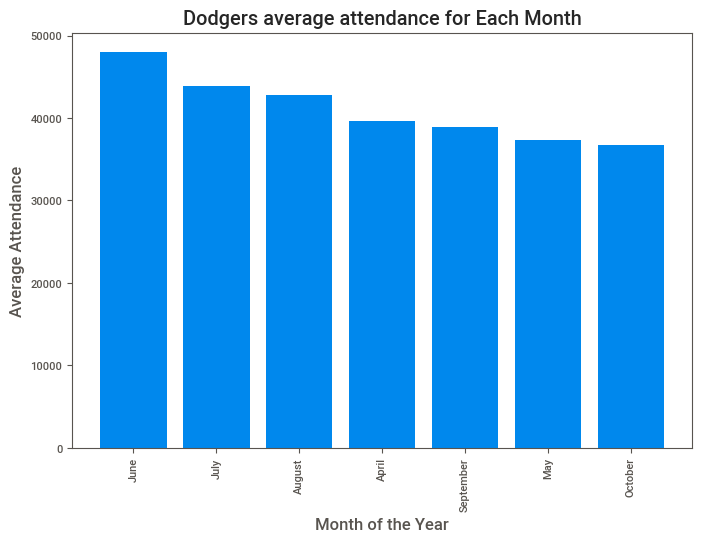

In [19]:
fig, ax = plt.subplots()
ax.bar(month_year, mean_score_2)
ax.set_xticklabels(month_year, rotation=90)
ax.set_ylabel("Average Attendance")
ax.set_xlabel("Month of the Year")
ax.set_title("Dodgers average attendance for Each Month")
plt.show()

In [20]:
mean_score_3 = (49777,49586,49267,46382,44207,42092,41897,40853,40665,40649,39631,39315,39296,38019,35383,35359,32245)
opponent = ("Angels","Mets","Nationals","White Sox","Cubs","Padres","Phillies","Cardinals","Marlins",
           "Reds","Rockies","Snakes","Giants","Pirates","Astros","Brewers","Braves")

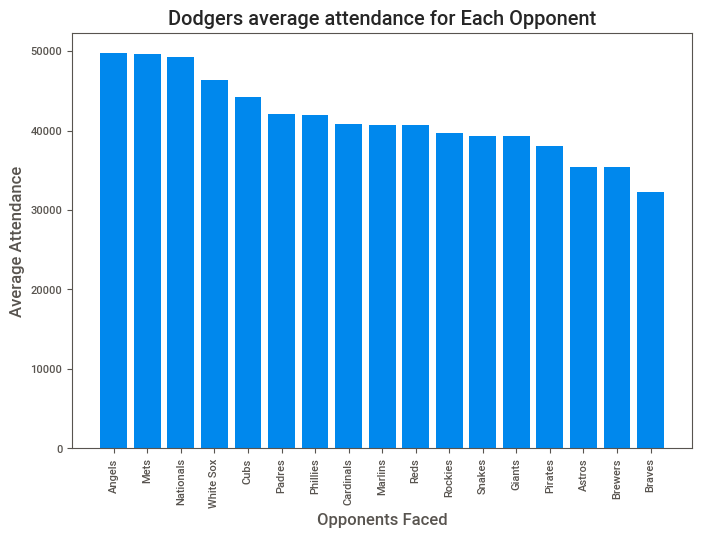

In [21]:
fig, ax = plt.subplots()
ax.bar(opponent, mean_score_3)
ax.set_xticklabels(opponent, rotation=90)
ax.set_ylabel("Average Attendance")
ax.set_xlabel("Opponents Faced")
ax.set_title("Dodgers average attendance for Each Opponent")
plt.show()

In [22]:
df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


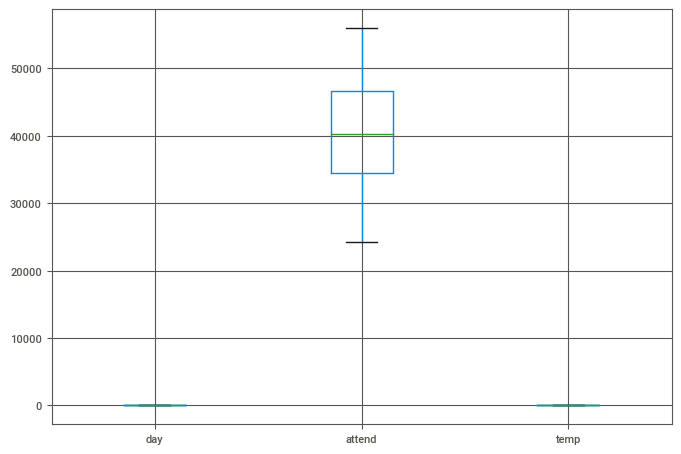

In [23]:
df.boxplot()

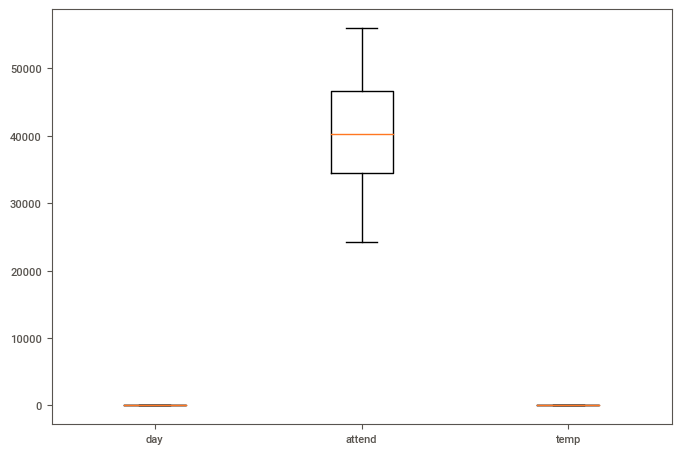

In [24]:
fig, ax=plt.subplots()
ax.boxplot([df["day"],df["attend"],df["temp"]])
ax.set_xticklabels(["day","attend","temp"])
plt.show()

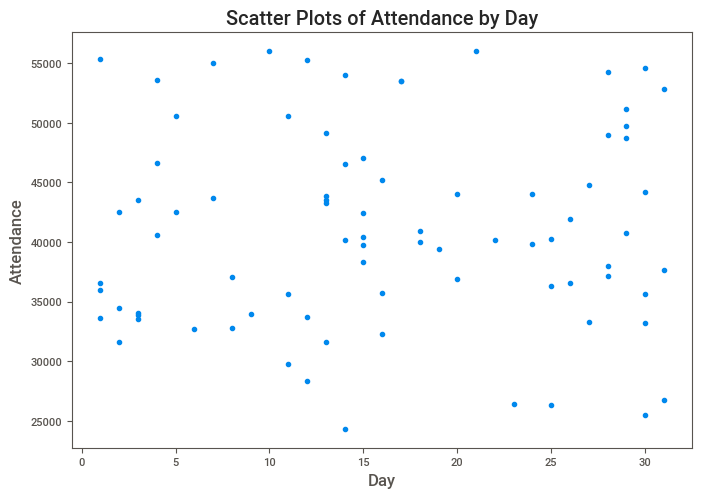

In [25]:
fig, ax=plt.subplots()
ax.scatter(df["day"], df["attend"])
ax.set_xlabel("Day")
ax.set_ylabel("Attendance")
ax.set_title("Scatter Plots of Attendance by Day")
plt.show()

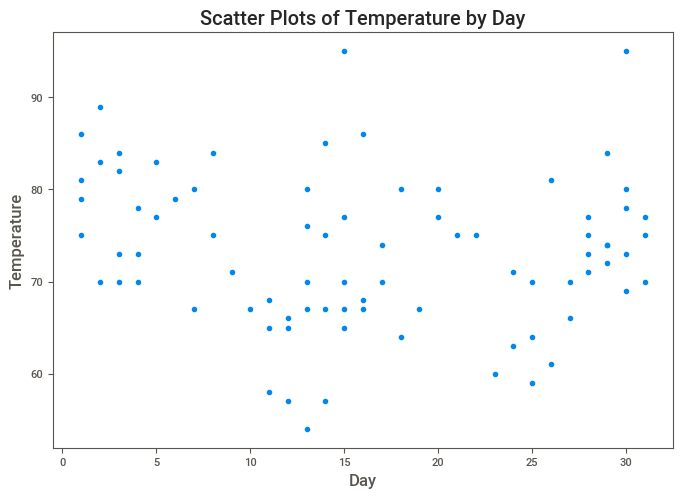

In [26]:
fig, ax=plt.subplots()
ax.scatter(df["day"], df["temp"])
ax.set_xlabel("Day")
ax.set_ylabel("Temperature")
ax.set_title("Scatter Plots of Temperature by Day")
plt.show()

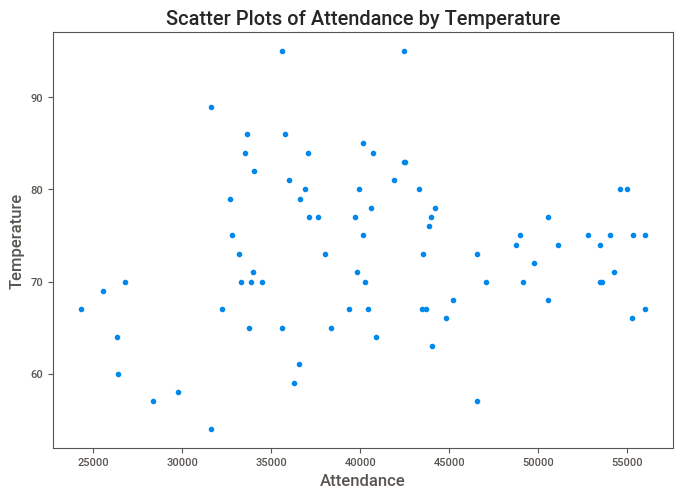

In [27]:
fig, ax=plt.subplots()
ax.scatter(df["attend"], df["temp"])
ax.set_xlabel("Attendance")
ax.set_ylabel("Temperature")
ax.set_title("Scatter Plots of Attendance by Temperature")
plt.show()

In [28]:
april = df.loc[0:11,:]
may = df.loc[12:29, :]
june = df.loc[30:38, :]
july = df.loc[39:50, :]
august = df.loc[51:65, :]
september = df.loc[66:77, :]
october = df.loc[78:80, :]

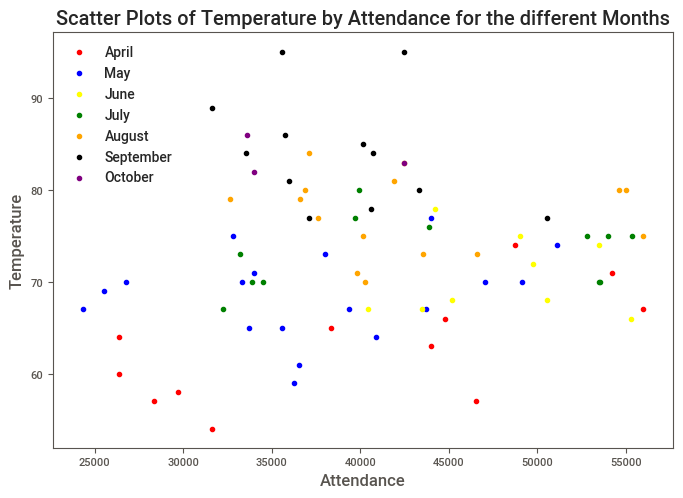

In [29]:
fig,ax = plt.subplots()
ax.scatter(april["attend"], april["temp"], color="red", label="April")
ax.scatter(may["attend"], may["temp"], color="blue", label="May")
ax.scatter(june["attend"], june["temp"], color="yellow", label="June")
ax.scatter(july["attend"], july["temp"], color="green", label="July")
ax.scatter(august["attend"], august["temp"], color="orange", label="August")
ax.scatter(september["attend"], september["temp"], color="black", label="September")
ax.scatter(october["attend"], october["temp"], color="purple", label="October")
ax.legend()
ax.set_xlabel("Attendance")
ax.set_ylabel("Temperature")
ax.set_title("Scatter Plots of Temperature by Attendance for the different Months")
plt.show()

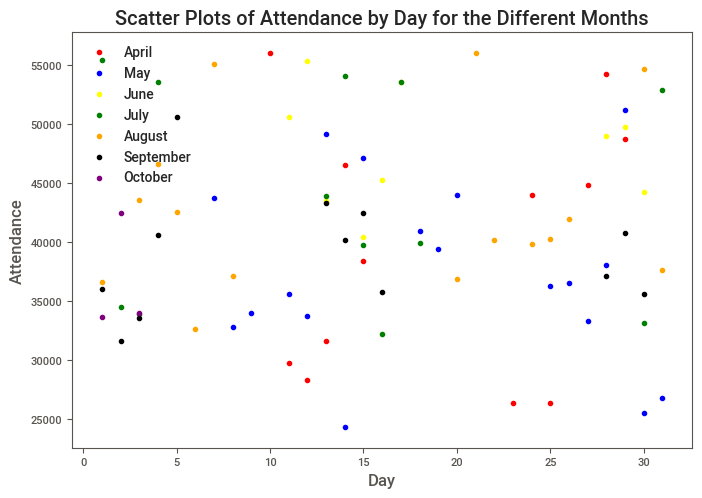

In [30]:
fig,ax = plt.subplots()
ax.scatter(april["day"], april["attend"], color="red", label="April")
ax.scatter(may["day"], may["attend"], color="blue", label="May")
ax.scatter(june["day"], june["attend"], color="yellow", label="June")
ax.scatter(july["day"], july["attend"], color="green", label="July")
ax.scatter(august["day"], august["attend"], color="orange", label="August")
ax.scatter(september["day"], september["attend"], color="black", label="September")
ax.scatter(october["day"], october["attend"], color="purple", label="October")
ax.legend()
ax.set_xlabel("Day")
ax.set_ylabel("Attendance")
ax.set_title("Scatter Plots of Attendance by Day for the Different Months")
plt.show()

In [31]:
df.corr()

,day,attend,temp
day,1.000000,0.027093,-0.127612
attend,0.027093,1.000000,0.098951
temp,-0.127612,0.098951,1.000000


In [32]:
df["bobblehead"].value_counts()

NO     70
YES    11
Name: bobblehead, dtype: int64

In [33]:
df["skies"].value_counts()

Clear     62
Cloudy    19
Name: skies, dtype: int64

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [35]:
lb_make = LabelEncoder()
df["month"] = lb_make.fit_transform(df["month"])
df["day_of_week"] = lb_make.fit_transform(df["day_of_week"])
df["opponent"] = lb_make.fit_transform(df["opponent"])
df["skies"] = lb_make.fit_transform(df["skies"])
df["day_night"] = lb_make.fit_transform(df["day_night"])
df["cap"] = lb_make.fit_transform(df["cap"])
df["shirt"] = lb_make.fit_transform(df["shirt"])
df["fireworks"] = lb_make.fit_transform(df["fireworks"])
df["bobblehead"] = lb_make.fit_transform(df["bobblehead"])
df.head(20)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,0,10,56000,5,12,67,0,0,0,0,0,0
1,0,11,29729,6,12,58,1,1,0,0,0,0
2,0,12,28328,4,12,57,1,1,0,0,0,0
3,0,13,31601,0,10,54,1,1,0,0,1,0
4,0,14,46549,2,10,57,1,1,0,0,0,0
5,0,15,38359,3,10,65,0,0,0,0,0,0
6,0,23,26376,1,2,60,1,1,0,0,0,0
7,0,24,44014,5,2,63,1,1,0,0,0,0
8,0,25,26345,6,2,64,1,1,0,0,0,0
9,0,27,44807,0,9,66,0,1,0,0,1,0


In [36]:
df.to_numpy()

array([[    0,    10, 56000,     5,    12,    67,     0,     0,     0,
            0,     0,     0],
       [    0,    11, 29729,     6,    12,    58,     1,     1,     0,
            0,     0,     0],
       [    0,    12, 28328,     4,    12,    57,     1,     1,     0,
            0,     0,     0],
       [    0,    13, 31601,     0,    10,    54,     1,     1,     0,
            0,     1,     0],
       [    0,    14, 46549,     2,    10,    57,     1,     1,     0,
            0,     0,     0],
       [    0,    15, 38359,     3,    10,    65,     0,     0,     0,
            0,     0,     0],
       [    0,    23, 26376,     1,     2,    60,     1,     1,     0,
            0,     0,     0],
       [    0,    24, 44014,     5,     2,    63,     1,     1,     0,
            0,     0,     0],
       [    0,    25, 26345,     6,     2,    64,     1,     1,     0,
            0,     0,     0],
       [    0,    27, 44807,     0,     9,    66,     0,     1,     0,
            0,     1

In [37]:
target = df[["day_of_week"]]

In [38]:
features = df[["attend"]]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=42)

In [40]:
X_train

,attend
62,40284
42,53570
54,42495
16,33735
39,55359
56,55024
80,34014
7,44014
50,52832
53,46588


In [41]:
X_test

,attend
30,50559
0,56000
22,44005
31,55279
18,24312
28,25509
10,54242
70,50560
4,46549
12,43713


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred = model.predict(X_test)


In [48]:
print(y_pred)

[5 5 5 5 1 1 5 5 5 5 6 0 6 5 6 0 5 0 6 6 5 5 6 5 5]


The result of the  multiclass Logistic Regression prediction showed that, I am likely to get a low score attendance on a Monday. 1=Monday. As a result I believe it is best to run a marketing promotion to increase attendance on a Monday as the Model predicted the minimum number of attendance on a Monday. We should also use bobblehead as there is a positive correlation between attendance and "bobblehead". We should also factor in the opponent as there is a positive correlation between attendance and the opponent.  

In [49]:
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,0,10,56000,5,12,67,0,0,0,0,0,0
1,0,11,29729,6,12,58,1,1,0,0,0,0
2,0,12,28328,4,12,57,1,1,0,0,0,0
3,0,13,31601,0,10,54,1,1,0,0,1,0
4,0,14,46549,2,10,57,1,1,0,0,0,0


In [50]:
df["day_of_week"].value_counts()

5    13
3    13
2    13
0    13
6    12
1    12
4     5
Name: day_of_week, dtype: int64

## Thought Process
Got an understanding of the problem and what the management was looking to solve (Best day of the week to run a marketing promotion to increase attendance. 
Got the data and loaded it into Python.
Inspected the data for missing data and data cleaning
Performed "Exploratory Data Analysis" EDA, using SWEETVIZ and AUTOVIZ.
Got the correlation between the variables and a bar chart, box plots and scatter plots of the variables.
Conducted a multiclass logistic regression to predict the day of the week for low attendance and then target that day to run a marketing promotion to increase attendance. I chose multiclass logistic regression as the day of the week has seven classes. The data was split into test and train. The data was trained on the train data and then tested on the test data. This was then used to predict the day with the lowest attendance e.g. attendance os 20,000 is more likely to occur on a Monday. This result was then used to make reccomendations.